In [41]:
c

We need to create our feature vector of exact same dimension as our training set. To convert our user input into dummy variables, we should save a dict of the the dummy variables. Later we can populate our feature vector for prediction using this dict.


# Test Vector for model testing

In [29]:
test_vector = [None] * 25
test_vector[0] =  2   # {'problem_type': {'defined': 0, 'investigate': 2, 'discover': 1}}
test_vector[1] =  2   #{'creative': {'somewhat_creative': 2, 'creative': 0, 'not_creative': 1}}
test_vector[2] =  1   #{'outdoors': {'limited': 1, 'indoors': 0, 'outdoors': 2}}
test_vector[3] =  4   #{'career': {'moving_parts': 2, 'sensors': 6, 'programming': 4, 'optimizing': 3, 'resources': 5, 'buildings': 0, 'molecules': 1}}
test_vector[4] =  1   #{'group_work': {'occasionally': 1, 'yes': 2, 'no': 0}}
test_vector[5] =  4   #{'liked_courses': {'computer_science': 4, 'biology': 1, 'math': 8, 'physics': 9, 'chemistry': 3, 'business': 2, 'autoshop': 0, 'geography': 5, 'visual_arts': 10, 'language_arts': 7, 'history': 6}}
test_vector[6] =  6   #{'disliked_courses': {'history': 6, 'visual_arts': 10, 'geography': 5, 'chemistry': 3, 'physics': 9, 'biology': 1, 'language_arts': 7, 'business': 2, 'math': 8, 'computer_science': 4, 'autoshop': 0}}
test_vector[7] =  3   #{'programming': {'partial': 3, 'complete': 0, 'no': 2, 'interested': 1}}
test_vector[8] =  8   #{'join_clubs': {'robotics': 7, 'nan': 6, 'environment': 4, 'student_council': 8, 'business': 2, 'hacker_club': 5, 'autoshop': 1, 'art/design': 0, 'consulting': 3}}
test_vector[9] =  0   #{'not_clubs': {'art/design': 0, 'business': 2, 'student_council': 8, 'autoshop': 1, 'hacker_club': 5, 'environment': 4, 'robotics': 7, 'nan': 6, 'consulting': 3}}
test_vector[10] = 1   #{'liked_projects': {'mars_water_treatment': 1, 'prototyping_instrument': 3, 'robot': 4, 'olympic_village': 2, 'battery': 0, 'uber_pool': 6, 'supercomputer': 5}}
test_vector[11] = 1   #{'disliked_projects': {'prototyping_instrument': 3, 'mars_water_treatment': 1, 'robot': 4, 'uber_pool': 6, 'olympic_village': 2, 'battery': 0, 'supercomputer': 5}}
test_vector[12] = 0   #{'tv_shows': {'big_bang_theory': 0, 'breaking_bad': 1, 'myth_busters': 4, 'silicon_valley': 6, 'planet_earth': 5, 'greys_anatomy': 2, 'house_hunters': 3}}
test_vector[13] = 0   #{'alternate_degree': {'cs': 2, 'applied_science': 0, 'health': 8, 'env': 5, 'poli_sci': 12, 'econ': 4, 'math': 11, 'business': 1, 'design': 3, 'visual_arts': 14, 'psych': 13, 'geo': 7, 'fin': 6, 'marketing': 10, 'lit': 9}}
test_vector[14] = 1   #{'expensive_equipment': {'yes': 2, 'maybe': 0, 'no': 1}}
test_vector[15] = 2   #{'drawing': {'partial': 2, 'bad': 0, 'good': 1}}
test_vector[16] = 1   #{'essay': {'yes': 2, 'no': 0, 'partial': 1}}
test_vector[17] = 0   #{'architecture': {0: 0, 1: 1}}
test_vector[18] = 0   #{'automotive': {1: 1, 0: 0}}
test_vector[19] = 1   #{'business': {0: 0, 1: 1}}
test_vector[20] = 0   #{'construction': {1: 1, 0: 0}}
test_vector[21] = 0   #{'health': {0: 0, 1: 1}}
test_vector[22] = 1   #{'environment': {0: 0, 1: 1}}
test_vector[23] = 1   #{'manufacturing': {1: 1, 0: 0}}
test_vector[24] = 1   #{'technology': {1: 1, 0: 0}}

test_vector = np.array(test_vector).reshape(1, -1)

# Basic Naiyve Bayes Model With No Calibration

In [30]:
model_name = 'nb_model_basic'

In [31]:
data = get_encoded_data('quiz_data.csv',model_name,'H')[0]

x_df = data.drop(axis=1,columns=["program"])
y_df = data["program"]

X = np.array(x_df) # convert dataframe into np array
Y = np.array(y_df) # convert dataframe into np array

mnb = MultinomialNB()
model = mnb.fit(X, Y) # fit the model using training data

cat = data.drop('program',axis=1)
cat = dict(zip(cat.columns,range(cat.shape[1])))

print(INV_INDEX_PROGRAM[model.predict(test_vector)[0]])

save_model(model,cat,model_name)
test_model(model_name,test_vector)

nano
Loading CAT file...
Loading model...
Results:
{'arch': 0.0, 'arch-e': 0.0, 'bmed': 0.0386, 'ce': 0.0188, 'chem': 0.1606, 'cive': 0.0002, 'elec': 0.0425, 'env': 0.0012, 'geo': 0.0002, 'mech': 0.0284, 'msci': 0.0298, 'nano': 0.5842, 'swe': 0.0035, 'syde': 0.0066, 'tron': 0.0854}


### LOO Validation for Basic Naive Bayes Model with no Calibration

In [32]:
# Leave One Out Validation
loo = LeaveOneOut()
loo.get_n_splits(X)
accuracy = []
for train_index, test_index in loo.split(X):
  X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]) # use this for training the model
  y_train, y_test = Y[train_index].ravel(), Y[test_index].ravel() # use this for testing the model

  mnb = MultinomialNB()
  model = mnb.fit(X_train, y_train) # fit the model using training data
  accuracy.append(mnb.score(X_test, y_test))

# Calculate accuracy
mean = np.array(accuracy).mean()
variance = np.array(accuracy).std() * 2

print("nb_model_basic Accuracy: %0.4f (+/- %0.4f)" % (mean, variance))

nb_model_basic Accuracy: 0.3673 (+/- 0.9641)


# Industry Only Naive Bayes Model

In [33]:
test_vector = [None] * 8
test_vector[0] = 0   #{'architecture': {0: 0, 1: 1}}
test_vector[1] = 0   #{'automotive': {1: 1, 0: 0}}
test_vector[2] = 1   #{'business': {0: 0, 1: 1}}
test_vector[3] = 0   #{'construction': {1: 1, 0: 0}}
test_vector[4] = 0   #{'health': {0: 0, 1: 1}}
test_vector[5] = 1   #{'environment': {0: 0, 1: 1}}
test_vector[6] = 1   #{'manufacturing': {1: 1, 0: 0}}
test_vector[7] = 1   #{'technology': {1: 1, 0: 0}}

test_vector = np.array(test_vector).reshape(1, -1)

In [34]:
model_name = 'nb_industry_only'
column_list = ['architecture', 'automotive', 'business', 'construction',
       'health', 'environment', 'manufacturing', 'technology','program']

In [38]:
data = get_encoded_data('quiz_data.csv',model_name,True)[0]
data = data[column_list]

x_df = data.drop(axis=1,columns=["program"])
y_df = data["program"]

X = np.array(x_df) # convert dataframe into np array
Y = np.array(y_df) # convert dataframe into np array

mnb = MultinomialNB()
model = mnb.fit(X, Y) # fit the model using training data

cat = data.drop('program',axis=1)
cat = dict(zip(cat.columns,range(cat.shape[1])))

print(INV_INDEX_PROGRAM[model.predict(test_vector)[0]])

save_model(model,cat,model_name)
test_model(model_name,test_vector)

msci
Loading CAT file...
Loading model...
Results:
{'arch': 0.001, 'arch-e': 0.0012, 'bmed': 0.0351, 'ce': 0.0936, 'chem': 0.1238, 'cive': 0.0061, 'elec': 0.0853, 'env': 0.01, 'geo': 0.0046, 'mech': 0.0991, 'msci': 0.201, 'nano': 0.1131, 'swe': 0.0338, 'syde': 0.0833, 'tron': 0.1092}


## Leave One Out Validation

In [39]:
# Leave One Out Validation
loo = LeaveOneOut()
loo.get_n_splits(X)
accuracy = []
for train_index, test_index in loo.split(X):
  X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]) # use this for training the model
  y_train, y_test = Y[train_index].ravel(), Y[test_index].ravel() # use this for testing the model

  mnb = MultinomialNB()
  model = mnb.fit(X_train, y_train) # fit the model using training data
  accuracy.append(mnb.score(X_test, y_test))

# Calculate accuracy
mean = np.array(accuracy).mean()
variance = np.array(accuracy).std() * 2

print("nb_model_basic Accuracy: %0.4f (+/- %0.4f)" % (mean, variance))

nb_model_basic Accuracy: 0.3803 (+/- 0.9709)


## Model Bias

[[0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0]]
model loaded...
{'mech': 126, 'bmed': 4, 'swe': 10, 'tron': 35, 'cive': 23, 'chem': 8, 'syde': 12, 'msci': 13, 'ce': 7, 'elec': 0, 'nano': 9, 'geo': 0, 'env': 14, 'arch-e': 1, 'arch': 4}


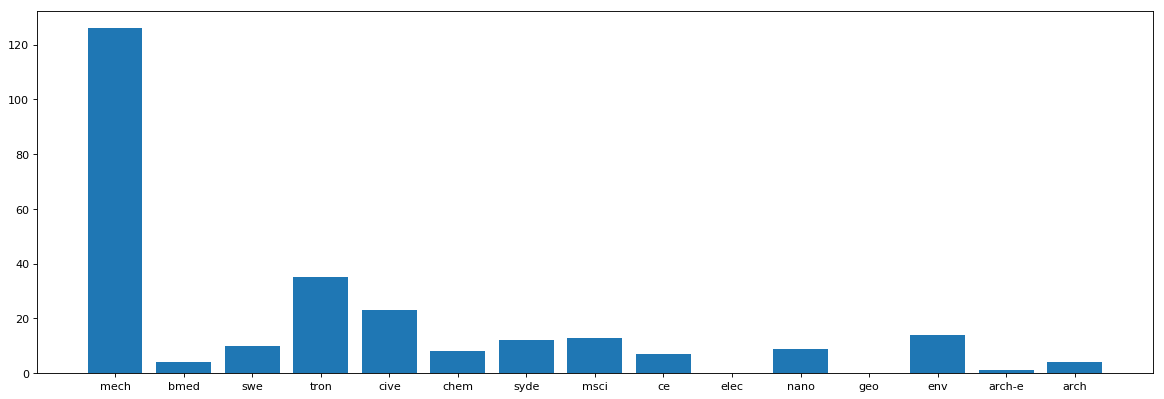

In [49]:
check_count = check_skew(model_name,architecture = True, automotive= True, business= True, construction= True,health= True, environment= True, manufacturing= True, technology= True)
print(check_count)
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(*zip(*check_count.items()))
plt.show()